In [ ]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

from LoadMultiFiles import LoadOneFileUproot, LoadFileListUprootOptimized
n_files_to_load = 10
list_corresponding_keys = ["alpha"]*n_files_to_load + ["e-"]*n_files_to_load
file_list = [f"root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/PSD_LowE/alpha/PSD/root/PSD-{i}.root" for i in range(n_files_to_load)] +\
            [f"root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/PSD_LowE/e-/PSD/root/PSD-{i}.root" for i in range(n_files_to_load)]
dir_PSD_diff_particle = LoadFileListUprootOptimized(file_list,list_corresponding_keys=list_corresponding_keys,
                            name_branch="evt", use_multiprocess=False)
print(dir_PSD_diff_particle.keys())

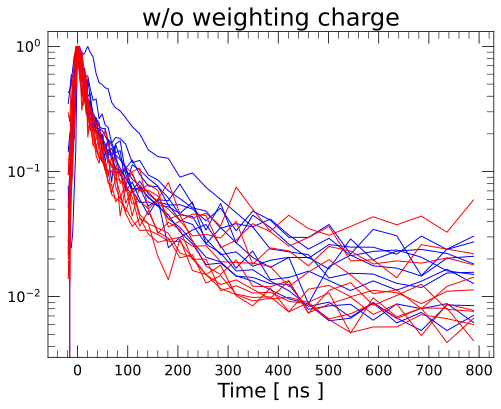

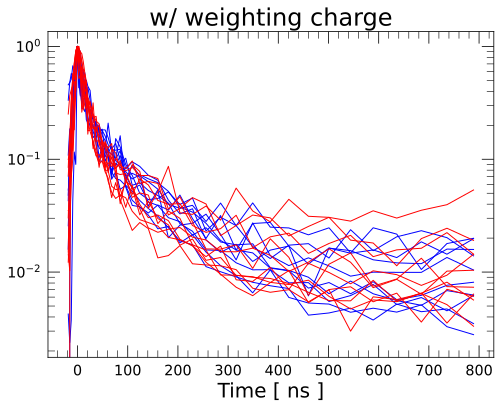

In [10]:
from HistTools import GetBinCenter
bins = np.loadtxt("/afs/ihep.ac.cn/users/l/luoxj/PSD_LoweE/alpha/Bins_Setting.txt",delimiter=",", dtype=float)
bins_center = GetBinCenter(bins)
bins_width = np.diff(bins)
dir_colors = {"alpha":"b", "e-":"r"}

for key, dir_PSD in dir_PSD_diff_particle.items():
    plt.figure("w/o charge")
    for i in range(len(dir_PSD["h_time_without_charge"]))[:10]:
        plt.plot(bins_center, dir_PSD["h_time_without_charge"][i]/bins_width/np.max(dir_PSD["h_time_without_charge"][i]/bins_width),
                 label=key,color=dir_colors[key],linewidth=1)
    plt.title(f"w/o weighting charge")
    plt.xlabel("Time [ ns ]")
    plt.semilogy()
    
    plt.figure("w/ charge")
    for i in range(len(dir_PSD["h_time_with_charge"]))[:10]:
        plt.plot(bins_center, dir_PSD["h_time_with_charge"][i]/bins_width/np.max(dir_PSD["h_time_with_charge"][i]/bins_width), label=key,
                 color=dir_colors[key],linewidth=1)
    plt.title(f"w/ weighting charge")
    plt.xlabel("Time [ ns ]")
    plt.semilogy()

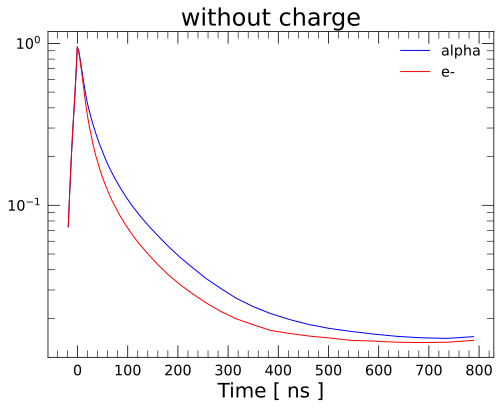

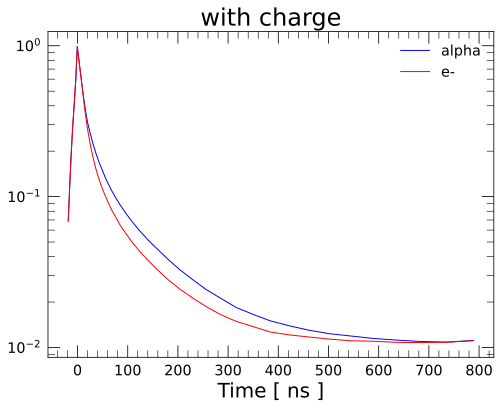

In [17]:
for key_charge in ["without", "with"]:
    plt.figure()
    for key, dir_PSD in dir_PSD_diff_particle.items():
        h_time_mean = np.zeros(len(bins_center))
        for i in range(len(dir_PSD[f"h_time_{key_charge}_charge"])):
            h_time_mean += dir_PSD[f"h_time_{key_charge}_charge"][i]/bins_width/np.max(dir_PSD[f"h_time_{key_charge}_charge"][i]/bins_width)
        h_time_mean = np.array(h_time_mean)/len(dir_PSD[f"h_time_{key_charge}_charge"])
        plt.plot(bins_center, h_time_mean,
                     label=key,color=dir_colors[key],linewidth=1)
    plt.legend()
    plt.semilogy()
    plt.xlabel("Time [ ns ]")
    plt.title(f"{key_charge} charge")

In [18]:
for key, dir_PSD in dir_PSD_diff_particle.items():
    print(dir_PSD["XYZ"])

[[  -501.41616821   3117.34082031   -181.15220642]
 [  3647.9519043    1076.40124512 -16979.21679688]
 [  4857.72021484   6701.05957031   3018.95239258]
 ...
 [  5377.99560547   7233.48095703  -3590.92504883]
 [ 10368.91113281  -5470.88378906 -12036.05566406]
 [ -3835.55493164   9710.7109375    -789.4185791 ]]
[[ -529.03057861  2875.69311523  -754.62738037]
 [ 4613.32324219 11007.56445312 -1067.87890625]
 [-7358.62304688  8442.54882812   361.11694336]
 ...
 [12370.65429688  4686.97070312  4697.97607422]
 [-9473.19140625 14029.54199219  -283.63861084]
 [ 5900.13183594  2698.99072266 15941.70410156]]
